In [1]:
# https://nami3373.hatenablog.com/entry/2019/05/27/190500

In [134]:
import os
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.metrics import fbeta_score

In [3]:
names=['id','title', 'abstract', 'preds']
names2=['id','title', 'abstract','text', 'preds']

In [4]:
sub = pd.read_csv("../input/sample_submit.csv", header=None)

In [35]:
train = pd.read_csv("../input/train.csv")
train

,id,title,abstract,judgement
0,0,One-year age changes in MRI brain volumes in o...,Longitudinal studies indicate that declines in...,0
1,1,Supportive CSF biomarker evidence to enhance t...,The present study was undertaken to validate t...,0
2,2,Occurrence of basal ganglia germ cell tumors w...,Objective: To report a case series in which ba...,0
3,3,New developments in diagnosis and therapy of C...,The etiology and pathogenesis of idiopathic ch...,0
4,4,Prolonged shedding of SARS-CoV-2 in an elderly...,NaN,0
...,...,...,...,...
27140,27140,The amyloidogenic pathway of amyloid precursor...,Amyloid beta-protein (A beta) is the main cons...,0
27141,27141,Technologic developments in radiotherapy and s...,We present a review of current technological p...,0
27142,27142,Novel screening cascade identifies MKK4 as key...,Phosphorylation of Tau at serine 422 promotes ...,0
27143,27143,Visualization of the gall bladder on F-18 FDOP...,The ability to label dihydroxyphenylalanine (D...,0


In [119]:
# the max number of files is 5
# input format: pd.DataFrame

label = [
        'preds',
        ]
def blend(a, b, c = 0, d = 0, e = 0):
    if (not isinstance(c, pd.DataFrame)) and (not isinstance(d, pd.DataFrame)) and (not isinstance(e, pd.DataFrame)):
        output = a.copy()
        for i in label:
            output[i] = a[i] * 0.5 + b[i] * 0.5
    elif (not isinstance(d, pd.DataFrame)) and (not isinstance(e, pd.DataFrame)):
        output = a.copy() # 0.5 + 0.3 + 0.2 
        for i in label:
            output[i] = a[i] * 0.5 + b[i] * 0.3+ c[i] * 0.2
    elif (not isinstance(e, pd.DataFrame)):
        output = a.copy()  # 0.45 + 0.25 + 0.2 + 0.1
        for i in label:
            #output[i] = a[i] * 0.45 + b[i] * 0.25 + c[i] * 0.2 + d[i] * 0.1
            output[i] = a[i] * 0.40 + b[i] * 0.35 + c[i] * 0.2 + d[i] * 0.05
    else: # 0.35 + 0.3 + 0.2 + 0.1 + 0.05
        output = a.copy()
        for i in label:
            #output[i] = a[i] * 0.35 + b[i] * 0.3 + c[i] * 0.2 + d[i] * 0.1 + e[i] * 0.05
            #output[i] = a[i] * 0.20 + b[i] * 0.20 + c[i] * 0.2 + d[i] * 0.2 + e[i] * 0.2
            #output[i] = a[i] * 0.40 + b[i] * 0.15 + c[i] * 0.15 + d[i] * 0.15 + e[i] * 0.15
            output[i] = a[i] * 0.40 + b[i] * 0.35 + c[i] * 0.10 + d[i] * 0.05+ e[i] * 0.1 #40best 
    return output

def blend6(a, b, c = 0, d = 0, e = 0,f=0):
    output = a.copy()
    for i in label:
        output[i] = (a[i]  + b[i] + c[i]  + d[i]  + e[i] +f[i]) /6.0
            
    return output

def blend7(a, b, c = 0, d = 0, e = 0,f=0,g=0):
    output = a.copy()
    for i in label:
        output[i] = (a[i]  + b[i] + c[i]  + d[i]  + e[i] +f[i] + g[i]) /7.0
            
    return output

def blend8(a, b, c = 0, d = 0, e = 0,f=0,g=0,h=0):
    output = a.copy()
    for i in label:
        output[i] = (a[i]  + b[i] + c[i]  + d[i]  + e[i] +f[i] + g[i] + h[i]) /8.0
            
    return output

def blend_coeff(files, coeff):
    output = files[0].copy()
    for i in label:
        tmp=0
        for j in range(len(files)):
            tmp += files[j].apply(lambda x: x[i]*coeff[j], axis=1) 
        output[i] = tmp
    return output
#df['age'] = df.apply(lambda x: x['age']+3, axis=1)

In [123]:
#v40 
file1 = pd.read_csv("../output/predictions_121.csv", names=names) #0.787, 0.911  pubmed256
file2 = pd.read_csv("../output/predictions_119.csv", names=names) #0.895, 0.909  pubmed512
file3 = pd.read_csv("../output/predictions_123.csv", names=names) #0.896, 0.896  pubmed382
file4 = pd.read_csv("../output/predictions_130.csv", names=names) #0.8896, 0.9155  pubmed256 pool
file5 = pd.read_csv("../output/predictions_129.csv", names=names) #0.896, 0.896  bc2bg256

filea = blend(file1, file2 ,file3, file4, file5)
filea.head()

,id,title,abstract,preds
27145,Estimating the potential effects of COVID-19 p...,The objective of the paper is to analyse chang...,Estimating the potential effects of COVID-19 p...,0.001641
27146,Leukoerythroblastic reaction in a patient with...,NaN,Leukoerythroblastic reaction in a patient with...,0.002012
27147,[15O]-water PET and intraoperative brain mappi...,[15O]-water PET was performed on 12 patients w...,[15O]-water PET and intraoperative brain mappi...,0.002873
27148,Adaptive image segmentation for robust measure...,We present a method that significantly improve...,Adaptive image segmentation for robust measure...,0.002302
27149,Comparison of Epidemiological Variations in CO...,The objective of this study is to compare the ...,Comparison of Epidemiological Variations in CO...,0.002780


In [124]:
fileb=blend_coeff(files=[file1,file2,file3,file4,file5], coeff=[0.40,0.35,0.10,0.05,0.1])
fileb.head()

,id,title,abstract,preds
27145,Estimating the potential effects of COVID-19 p...,The objective of the paper is to analyse chang...,Estimating the potential effects of COVID-19 p...,0.001641
27146,Leukoerythroblastic reaction in a patient with...,NaN,Leukoerythroblastic reaction in a patient with...,0.002012
27147,[15O]-water PET and intraoperative brain mappi...,[15O]-water PET was performed on 12 patients w...,[15O]-water PET and intraoperative brain mappi...,0.002873
27148,Adaptive image segmentation for robust measure...,We present a method that significantly improve...,Adaptive image segmentation for robust measure...,0.002302
27149,Comparison of Epidemiological Variations in CO...,The objective of this study is to compare the ...,Comparison of Epidemiological Variations in CO...,0.002780


In [10]:
# Set random seed for reproduction
#np.random.seed(2019)
#pred_df = pd.DataFrame(np.random.rand(100000, 5), columns=['pred1', 'pred2', 'pred3', 'pred4', 'pred5'])

In [367]:
oof1 = pd.read_csv("../output/oof_df_121_0.77987.csv")
oof1.sort_values('id',inplace=True)
oof2 = pd.read_csv("../output/oof_df_119_0.89477.csv")
oof2.sort_values('id',inplace=True)
oof3 = pd.read_csv("../output/oof_df_123_0.89585.csv")
oof3.sort_values('id',inplace=True)
oof4 = pd.read_csv("../output/oof_df_130_0.88858.csv")
oof4.sort_values('id',inplace=True)
oof5 = pd.read_csv("../output/oof_df_129_0.88820.csv")
oof5.sort_values('id',inplace=True)

In [379]:
oof1 = pd.read_csv("../output/oof_df_124_0.89474.csv")
oof1.sort_values('id',inplace=True)
oof2 = pd.read_csv("../output/oof_df_119_0.89477.csv")
oof2.sort_values('id',inplace=True)
oof3 = pd.read_csv("../output/oof_df_123_0.89585.csv")
oof3.sort_values('id',inplace=True)
oof4 = pd.read_csv("../output/oof_df_130_0.88858.csv")
oof4.sort_values('id',inplace=True)
oof5 = pd.read_csv("../output/oof_df_129_0.88820.csv")
oof5.sort_values('id',inplace=True)

In [ ]:
#file5 = pd.read_csv("../output/predictions_129.csv", names=names) #0.896,  0.896    bc2bg256
#file6 = pd.read_csv("../output/predictions_130.csv", names=names) #0.8896, 0.9155   pubmed256   pool
#file6 = pd.read_csv("../output/predictions_131.csv", names=names) #0.892,  0.89953  bc2b256    前処理有り
#file5 = pd.read_csv("../output/predictions_132.csv", names=names) #0.874,  0.89950  pubmed256　前処理有り
#file5 = pd.read_csv("../output/predictions_133.csv", names=names) #0.898,  0.910    pubmed512　前処理有り
#file5 = pd.read_csv("../output/predictions_134.csv", names=names) #0.894,  0.903    pubmed512　前処理有り pool
#file5 = pd.read_csv("../output/predictions_135.csv", names=names) #0.8965, 0.912    pubmed256　前処理有り pool
#file5 = pd.read_csv("../output/predictions_136.csv", names=names) #0.8864, 0.901    euadr256　 前処理有り pool
#file5 = pd.read_csv("../output/predictions_137.csv", names=names) #0.900,  0.9165   bc2bg256　 pool
#file5 = pd.read_csv("../output/predictions_138.csv", names=names) #0.894,  0.9134   euadr256　 pool
#file5 = pd.read_csv("../output/predictions_139.csv", names=names) #0.871,  0.9134   pumed512　 pool
#file5 = pd.read_csv("../output/predictions_140.csv", names=names) #0.891,  0.9052   pubmed256　 amp

In [303]:
oof1 = pd.read_csv("../output/oof_df_140_0.90090.csv")
oof1.sort_values('id',inplace=True)
oof2 = pd.read_csv("../output/oof_df_119_0.89477.csv")
oof2.sort_values('id',inplace=True)
oof3 = pd.read_csv("../output/oof_df_130_0.88858.csv")
oof3.sort_values('id',inplace=True)
oof4 = pd.read_csv("../output/oof_df_137_0.90545.csv")
oof4.sort_values('id',inplace=True)
oof5 = pd.read_csv("../output/oof_df_140_0.90090.csv")
oof5.sort_values('id',inplace=True)

In [325]:
oof1 = pd.read_csv("../output/oof_df_119_0.89477.csv")
oof1.sort_values('id',inplace=True)
oof2 = pd.read_csv("../output/oof_df_133_0.90544.csv")
oof2.sort_values('id',inplace=True)
oof3 = pd.read_csv("../output/oof_df_130_0.88858.csv")
oof3.sort_values('id',inplace=True)
oof4 = pd.read_csv("../output/oof_df_137_0.90545.csv")
oof4.sort_values('id',inplace=True)
oof5 = pd.read_csv("../output/oof_df_140_0.90090.csv")
oof5.sort_values('id',inplace=True)

In [380]:
pred_df = oof1.copy()
pred_df.drop(['abstract','text','fold','title','id','judgement','preds'],axis=1, inplace=True)
    #pd.DataFrame(
pred_df['pred1'] = oof1['preds']
pred_df['pred2'] = oof2['preds']
pred_df['pred3'] = oof3['preds']
pred_df['pred4'] = oof4['preds']
pred_df['pred5'] = oof5['preds']

In [381]:
#np.random.seed(2019)
#y_train = pd.Series(np.random.randint(2, size=100000), name='target')
y_train=train['judgement']

In [382]:
for i in range(pred_df.shape[1]):
    print('MSE for {}: {:.7f}'.format(pred_df.columns[i], 
                                  mean_squared_error(y_train, pred_df.iloc[:, i])))

MSE for pred1: 0.0128939
MSE for pred2: 0.0109525
MSE for pred3: 0.0125148
MSE for pred4: 0.0116346
MSE for pred5: 0.0108096


In [415]:
border = 0.023282372444280715
#border = 0.008
#score = fbeta_score(Y_values, np.where(preds < border, 0, 1), beta=7.0)
    
for i in range(pred_df.shape[1]):
    a=pred_df.columns[i]
    print('fbeta for {}: {:.7f}'.format(a, 
                                    fbeta_score(y_train.values, np.where(pred_df[a] < border, 0, 1), beta=7.0)))

fbeta for pred1: 0.8723066
fbeta for pred2: 0.8659133
fbeta for pred3: 0.8633576
fbeta for pred4: 0.8777771
fbeta for pred5: 0.8672746


In [384]:
# Define the objective function to optimize MSE by using ScyiPy algorithm.
def mse_func(weights):
    ''' scipy minimize will pass the weights as a numpy array '''
    final_prediction = 0
    for weight, prediction in zip(weights, predictions):
            final_prediction += weight*prediction

    return mean_squared_error(Y_values, final_prediction)

In [401]:
def fbeta_func(weights):
    border = 0.023282372444280715
    
    filec=blend_coeff(files=[oof1,oof2,oof3,oof4,oof5], coeff=weights)
    
    score = fbeta_score(Y_values, np.where(filec["preds"] < border, 0, 1), beta=7.0)
    
    return score

In [386]:
Y_values = y_train.values

lls = []
wghts = []
predictions = []
for i in range(pred_df.shape[1]):
    predictions.append(np.array(pred_df.iloc[:, i]))

### Use SLSQP as a solver
Inspired by the Kaggle kernels below; <br>
https://www.kaggle.com/hamzaben/tuned-random-forest-lasso-and-xgboost-regressors https://www.kaggle.com/rishiarora/finding-ensemble-weights

In [387]:
%%time
lls = []
wghts = []
# Optimization runs 100 times.
for i in range(200):
    starting_values = np.random.uniform(size=pred_df.shape[1])
    starting_values = [1,0,0,0,0]
    # cons are given as constraints.
    cons = ({'type':'eq','fun':lambda w: 1-sum(w)})
    bounds = [(0,1)]*len(predictions)
    
    res = minimize(mse_func, starting_values, constraints=cons, #fbeta_func
                   bounds = bounds, method='SLSQP')

    lls.append(res['fun'])
    wghts.append(res['x'])

CPU times: user 2.34 s, sys: 0 ns, total: 2.34 s
Wall time: 2.34 s


In [402]:
bestSC = np.min(lls)
bestWght = wghts[np.argmin(lls)]

print('\n Ensemble Score: {best_score:.7f}'.format(best_score=bestSC))
print('\n Best Weights: {weights:}'.format(weights=bestWght))
print('MSE: {:.7f}'.format(mean_squared_error(y_train, np.sum(bestWght * pred_df, axis=1))))
print(fbeta_func(bestWght))


 Ensemble Score: 0.0097488

 Best Weights: [0.09257545 0.28150868 0.11838947 0.18100508 0.32652132]
MSE: 0.0097488
0.9113479471963184


In [342]:
filec=blend_coeff(files=[file1,file2,file3,file4,file5], coeff=bestWght)
print(bestWght)
filec.head()

[0.19747128 0.31964631 0.00057598 0.24644011 0.23586631]


,id,title,abstract,preds
27145,Estimating the potential effects of COVID-19 p...,The objective of the paper is to analyse chang...,Estimating the potential effects of COVID-19 p...,0.000977
27146,Leukoerythroblastic reaction in a patient with...,NaN,Leukoerythroblastic reaction in a patient with...,0.001665
27147,[15O]-water PET and intraoperative brain mappi...,[15O]-water PET was performed on 12 patients w...,[15O]-water PET and intraoperative brain mappi...,0.001777
27148,Adaptive image segmentation for robust measure...,We present a method that significantly improve...,Adaptive image segmentation for robust measure...,0.001753
27149,Comparison of Epidemiological Variations in CO...,The objective of this study is to compare the ...,Comparison of Epidemiological Variations in CO...,0.001138


Use L-BFGS-B as a solver <br>
Inspired by the Kaggle kernel below; <br>
https://www.kaggle.com/tilii7/ensemble-weights-minimization-vs-mcmc

In [238]:
%%time
# Optimization runs 100 times.
for i in range(200):
    starting_values = np.random.uniform(size=pred_df.shape[1])
    a=1/pred_df.shape[1]
    starting_values = [a,a,a,a,a]
    bounds = [(0,1)]*len(predictions)
    
    res = minimize(mse_func, starting_values, method='L-BFGS-B', 
                   bounds=bounds, options={'disp': False, 'maxiter': 100000})

    lls.append(res['fun'])
    wghts.append(res['x'])

CPU times: user 3.59 s, sys: 0 ns, total: 3.59 s
Wall time: 3.59 s


In [239]:
bestSC = np.min(lls)
bestWght = wghts[np.argmin(lls)]

print('\n Ensemble Score: {best_score:.7f}'.format(best_score=bestSC))
print('\n Best Weights: {weights:}'.format(weights=bestWght))
print('MSE: {:.7f}'.format(mean_squared_error(y_train, np.sum(bestWght * pred_df, axis=1))))
print(fbeta_func(bestWght))


 Ensemble Score: 0.0096532

 Best Weights: [0.         0.32685107 0.17236832 0.20957497 0.39760871]
MSE: 0.0096532
0.9130763416477701


In [242]:
print(fbeta_func([0.4,0.35,0.1,0.05,0.1]))

0.9086525421174769


In [144]:
#file5 = pd.read_csv("../output/predictions_129.csv", names=names) #0.896,  0.896    bc2bg256
#file6 = pd.read_csv("../output/predictions_130.csv", names=names) #0.8896, 0.9155   pubmed256   pool
#file6 = pd.read_csv("../output/predictions_131.csv", names=names) #0.892,  0.89953  bc2b256    前処理有り
#file5 = pd.read_csv("../output/predictions_132.csv", names=names) #0.874,  0.89950  pubmed256　前処理有り
#file5 = pd.read_csv("../output/predictions_133.csv", names=names) #0.898,  0.910    pubmed512　前処理有り
#file5 = pd.read_csv("../output/predictions_134.csv", names=names) #0.894,  0.903    pubmed512　前処理有り pool
#file5 = pd.read_csv("../output/predictions_135.csv", names=names) #0.8965, 0.912    pubmed256　前処理有り pool
#file5 = pd.read_csv("../output/predictions_136.csv", names=names) #0.8864, 0.901    euadr256　 前処理有り pool
#file5 = pd.read_csv("../output/predictions_137.csv", names=names) #0.900,  0.9165   bc2bg256　 pool
#file5 = pd.read_csv("../output/predictions_138.csv", names=names) #0.894,  0.9134   euadr256　 pool
#file5 = pd.read_csv("../output/predictions_139.csv", names=names) #0.871,  0.9134   pumed512　 pool
#file5 = pd.read_csv("../output/predictions_140.csv", names=names) #0.891,  0.9052   pubmed256　 amp

In [343]:
border = 0.023282372444280715
predictions = np.where(filec["preds"] < border, 0, 1)
print(bestWght)
 # submission
sub[1] = predictions
sub.to_csv("../output/ensemble_submission_47.csv", index=False, header=False)
sub[1].value_counts()

[0.19747128 0.31964631 0.00057598 0.24644011 0.23586631]


0    37703
1     3131
Name: 1, dtype: int64

In [8]:
sub = pd.read_csv("../output/ensemble_submission_34-4.csv", header=None)
sub[1].value_counts()

0    37546
1     3288
Name: 1, dtype: int64

<AxesSubplot:>

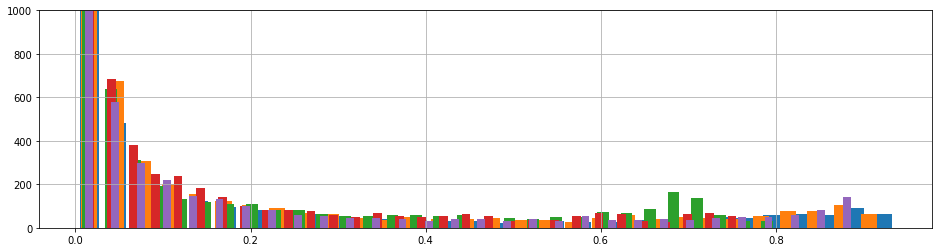

In [344]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(16,4))
plt.ylim(0,1000)

file5['preds'].hist(bins=30,cumulative=False,rwidth=0.7)
file4['preds'].hist(bins=30,cumulative=False,rwidth=0.6)
file3['preds'].hist(bins=30,cumulative=False,rwidth=0.5)
file1['preds'].hist(bins=30,cumulative=False,rwidth=0.4)
file2['preds'].hist(bins=30,cumulative=False,rwidth=0.3)